In [1]:
import numpy as np

#from keras.utils import to_categorical
#import os

# import glob
import cv2 
import math

from scipy.linalg import svd
from numpy import linalg as LA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split



%matplotlib inline

In [2]:
import os

In [3]:
count = 0

X = []

for folder in os.listdir('Gender Dataset/train/'):
    
    for img in os.listdir('Gender Dataset/train/' + str(folder)):
        
        n = cv2.imread('Gender Dataset/train/' + str(folder) + '/' + str(img))
        gray = cv2.cvtColor(n,cv2.COLOR_BGR2GRAY)
        gray = cv2.resize(gray,(50,50))
        X.append(gray)
        count=count+1

In [4]:
sizeImg = X[0].shape 
A = np.zeros((sizeImg[0]*sizeImg[1],len(X)))

for i in range(0, len(X)):
    tmp = (np.array(X[i]).reshape(-1))
    A[:,i] = np.array(tmp)

In [5]:
A.shape

(2500, 1600)

In [6]:
Array = A

In [7]:
Y = np.zeros((len(X)))

i = 0

for folder in os.listdir('Gender Dataset/train/'):
    
    for img in os.listdir('Gender Dataset/train/' + str(folder)):
        
        if folder == 'man':
    
            Y[i]  = 0
        
        elif folder == 'woman':
            
            Y[i]  = 1
            
        i = i + 1

In [8]:
A = A.T
from sklearn.model_selection import train_test_split
train_X,test_X,train_Y,test_Y = train_test_split(A, Y, test_size=0.1, random_state=13)
train_X.shape,test_X.shape,train_Y.shape,test_Y.shape

((1440, 2500), (160, 2500), (1440,), (160,))

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_X = sc.fit_transform(train_X)
test_X = sc.transform(test_X)

In [10]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
#KNeighborsClassifier()

classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(train_X, train_Y)

KNeighborsClassifier()

In [11]:
pred_Y = classifier.predict(test_X)
test_Y = test_Y.tolist()

In [12]:
y_test_np = np.asarray(test_Y)
y_test_np

array([1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1.,
       1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1.,
       1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0.,
       0., 1., 0., 0., 1., 1., 0.])

In [13]:
print(pred_Y)

[1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0.
 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1.
 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0.
 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0.
 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1.
 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1.
 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0.]


In [14]:
variation = y_test_np - pred_Y

count = 0
for i in variation:
    if i == 0:
        count += 1
accuracy = ( (100 * count) / len(pred_Y))
print(accuracy)

76.25


In [15]:
correct = np.where(pred_Y == test_Y)[0]
print ("Found %d correct labels" % len(correct))
#for i, correct in enumerate(correct[:9]):
    #plt.subplot(3,3,i+1)
    #plt.imshow(cv2.resize(test_X[correct],(50,50)), cmap='gray', interpolation='none')
    #plt.title("Predicted {}, Class {}".format(pred_Y[correct], test_Y[correct]))
    #plt.tight_layout()

Found 122 correct labels


# Graph

In [7]:
import matplotlib.pyplot as plt
import numpy as np

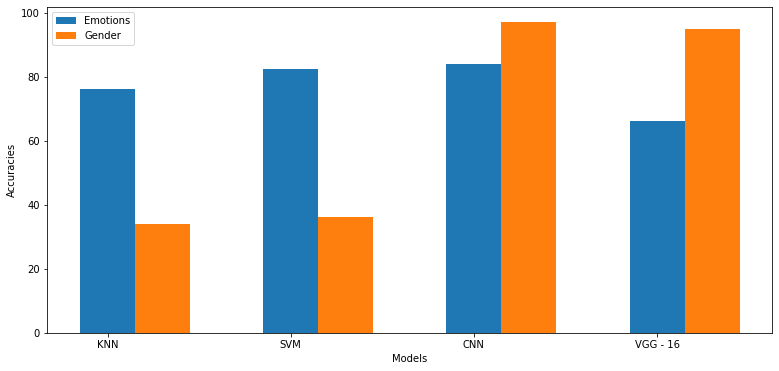

In [9]:
N = 4

Emotions = (76.25, 82.5, 84, 66)

Gender = (34.01, 36.07, 97, 95)

ind = np.arange(N)

    # Figure size
plt.figure(figsize=(13, 6))

    # Width of a bar
width = 0.3

    # Plotting
plt.bar(ind, Emotions, width, label='Emotions')
plt.bar(ind + width, Gender, width, label='Gender')

plt.xlabel('Models')
plt.ylabel('Accuracies')
# plt.title('Comparison of PSNR values of 20 images for AES and Triples DES algorithms')

models = ['KNN', 'SVM', 'CNN', 'VGG - 16']

x = np.arange(0, len(models))
plt.xticks(x, models)

    # Finding the best position for legends and putting it
plt.legend(loc='best')
plt.savefig("graph.png")
plt.show()